In [1]:
import numpy as np

In [2]:
# 데이터셋 임포트
X = np.load("dataset_1.npy")

In [3]:
X  # 2차원 좌표상의 300개의 점

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

In [4]:
import matplotlib.pyplot as plt

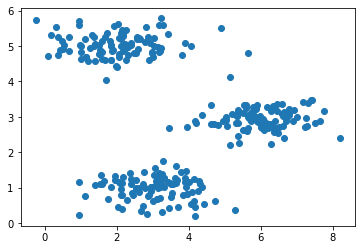

In [5]:
plt.scatter(X[:, 0], X[:, 1]);

In [6]:
def 최근접_중심점_찾기(X, centroids):
    """
    데이터셋 X의 각 요소에 대한 클러스터 지정하는 함수

    입력인자:
        X (ndarray): (m개의 행, n개의 칼럼) 형태의 데이터셋
        centroids (ndarray): k개의 클러스터 중심점(만약 centroids == 3이라면 [0, 1, 2])

    반환값:
        idx: 데이터셋과 동일한 길이의 인덱스 배열(각 요소가 어느 클러스터에 포함되는지 나타냄)

    """

    # K값 설정(클러스터 갯수)
    K = centroids.shape[0]

    # 이 함수가 리턴할 인덱스 배열 정의
    idx = np.zeros(X.shape[0], dtype=int)  # 모든 요소 인덱스의 초깃값은 0으로(클러스터를 0으로 지정)

    for i in range(X.shape[0]):  # 모든 점(i)을 차례대로 순회하면서
          distance = []
          for j in range(K):  # 클러스터 갯수(j)만큼 돌면서
              norm_ij = np.linalg.norm(X[i] - centroids[j])  # 각 점(X_i)과 클러스터 중심점(centroids_j)간의 거리(norm) 계산
              distance.append(norm_ij)  # 각 점마다 모든 클러스터중심점과의 거리를 계산

          idx[i] = np.argmin(distance)  # distance 중 가장 작은 값(=가장 짧은 거리)의 인덱스(=클러스터번호)를 찾음

    return idx  # 데이터셋의 각 점들이 어느 클러스터중심점과 가장 가까운지 나타내는 배열(idx)을 리턴

In [7]:
def 중심점_계산(X, idx, K):
    """
    각 클러스터에 속한 모든 점들의 평균을 구해서
    새로운 중심점 좌표를 리턴하는 함수
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):  # 각 클러스터 인덱스별로
        points = X[idx == k]  # 클러스터에 속한 점들만 추려서 좌표를 구하고
        centroids[k] = np.mean(points, axis = 0)  # 해당 점들의 각 좌표축별로 평균값을 구함

    return centroids

In [13]:
def kMeans_시각화(X_, centroids_, previous_centroids_, idx_, K, i_):
    """
    kMeans 알고리즘 진행과정을 시각화하기 위한 헬퍼함수
    """

    # 각 점을 먼저 그리고
    plt.scatter(X_[:, 0], X_[:, 1], c=idx_)

    # 클러스터 중심점은 검정색 X로 그림
    plt.scatter(centroids_[:, 0], centroids_[:, 1], marker='x', c='k', linewidths=3)

    # 중심점 이동 이력을 선으로 그리기
    for j in range(centroids_.shape[0]):
        plt.plot([centroids_[j, :][0], previous_centroids_[j, :][0]],
                 [centroids_[j, :][1], previous_centroids_[j, :][1]],"-k", linewidth=1)

    plt.title(f"Iteration number {i_}")

In [14]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    1. 데이터셋의 모든 점들에 대해 인덱스를 지정한 후,
    2. 동일한 인덱스의 점들의 중심점을 다시 찾고,
    3. 클러스터 중심점을 위에서 찾은 중심점으로 이동.
    4. 1~3의 과정을 max_iters 횟수만큼 반복
    """

    # 초깃값 설정
    m, n = X.shape  # m은 데이터셋 갯수, n은 점의 좌표축 갯수
    K = initial_centroids.shape[0]  # K는 클러스터 갯수
    centroids = initial_centroids  # 각 클러스터 중심점은 임의로 지정함
    previous_centroids = centroids
    idx = np.zeros(m)  # 각 점들의 소속 클러스터는 모두 0으로 시작함

    # K-Means 알고리즘 실행
    for i in range(max_iters):

        print(f"K-Means iteration {i}/{max_iters-1}")

        idx = 최근접_중심점_찾기(X, centroids)

        # 시각화하기
        kMeans_시각화(X, centroids, previous_centroids, idx, K, i)
        previous_centroids = centroids

        # 새롭게 지정된 클러스터별 중심점 재계산
        centroids = 중심점_계산(X, idx, K)
        plt.show()
    return centroids, idx

K-Means iteration 0/9


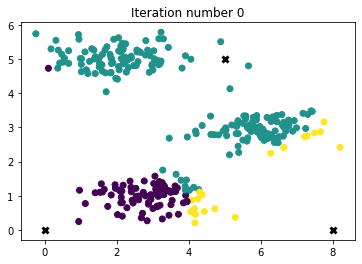

K-Means iteration 1/9


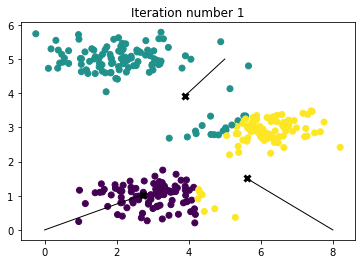

K-Means iteration 2/9


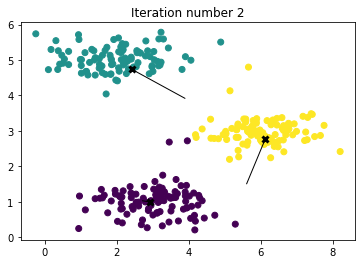

K-Means iteration 3/9


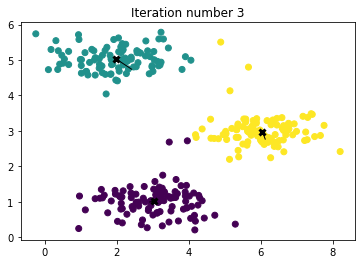

K-Means iteration 4/9


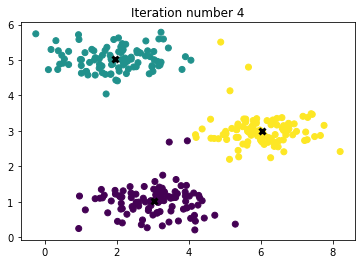

K-Means iteration 5/9


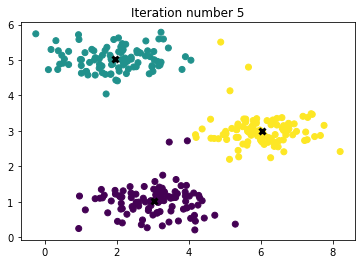

K-Means iteration 6/9


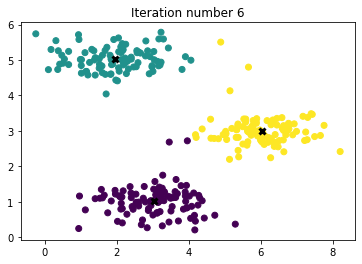

K-Means iteration 7/9


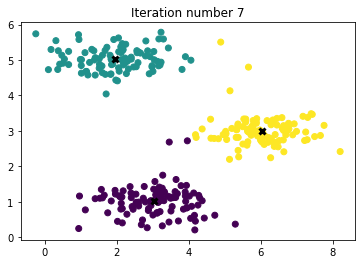

K-Means iteration 8/9


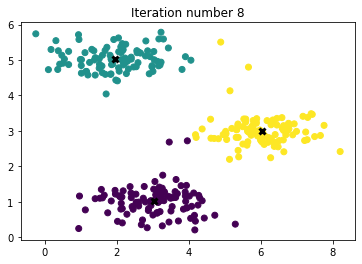

K-Means iteration 9/9


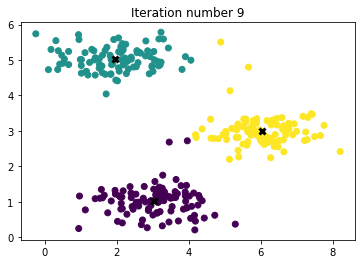

In [15]:
K = 3
max_iters = 10
initial_centroids = np.array([[0, 0], [5, 5], [8, 0]])

centroids, idx = run_kMeans(X, initial_centroids, max_iters)

In [11]:
centroids  # 각 클러스터 중심점들의 최종 좌표

array([[3.04367119, 1.01541041],
       [1.95399466, 5.02557006],
       [6.03366736, 3.00052511]])

In [12]:
idx  # 각 점의 소속클러스터(최종)

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [16]:
def kMeans_init_centroids(X, K):
    """
    클러스터 중심점의 초깃값을
    각각 데이터셋 중 한 개의 점으로 랜덤하게 초기화해주는 함수
    """

    # 데이터셋을 랜덤하게 섞어서
    randidx = np.random.permutation(X.shape[0])

    # 랜덤배열 중 K개의 좌표를 각 클러스터 중심점으로 사용
    centroids = X[randidx[:K]]

    return centroids

K-Means iteration 0/9


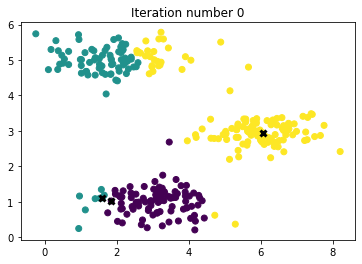

K-Means iteration 1/9


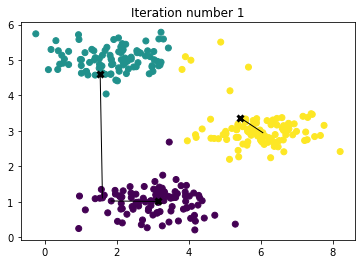

K-Means iteration 2/9


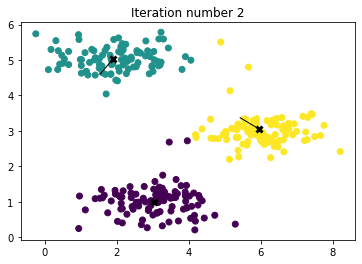

K-Means iteration 3/9


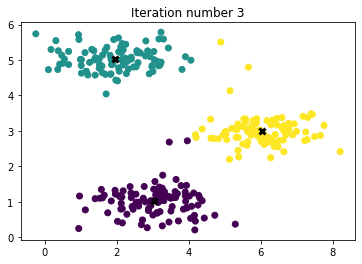

K-Means iteration 4/9


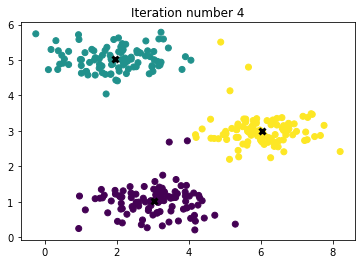

K-Means iteration 5/9


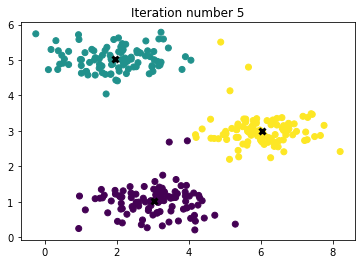

K-Means iteration 6/9


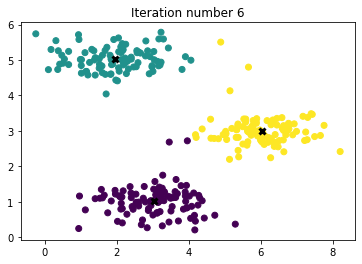

K-Means iteration 7/9


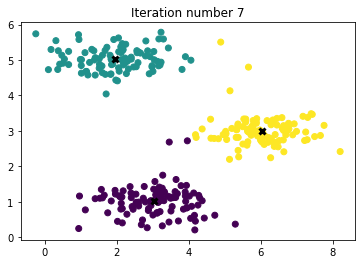

K-Means iteration 8/9


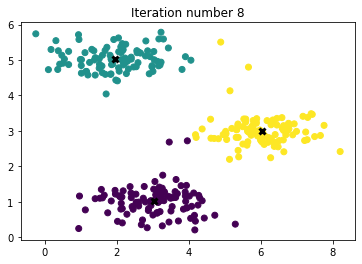

K-Means iteration 9/9


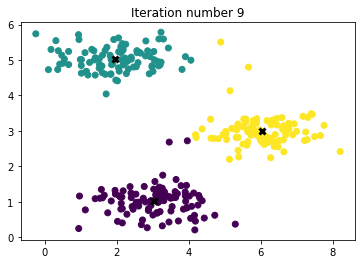

In [21]:
K = 3
max_iters = 10
initial_centroids = kMeans_init_centroids(X, K)

centroids, idx = run_kMeans(X, initial_centroids, max_iters)